In [54]:
#importing the required libraries: pandas,matplotlib.pyplot, and seaborn.
import pandas as pd #for data manipulation and transformation
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
data = pd.read_csv(r"C:\Users\Sarah\Downloads\fake_job_postings.csv", index_col=0) #importing the dataset from Downloads folder 
#and storing it under the variable name 'data'. 
#The first column of the dataframe ("job_id") is set to be the index using the index_col parameter.
data.dropna(subset=["industry"],inplace=True) #dropping null values in the industry column. 
#Inplace=True makes the changes to the original dataframe, rather than making a modified copy.
data.head() #returns the first five rows of the dataframe (to view the data).

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0


In [55]:
data["industry"].isna().sum() #checking for any null value in the industry column.Returns the number of null values.

0

In [56]:
data["fraudulent"].isna().sum() #checking for any null value in the fraudulent column. Returns the number of null values.

0

In [57]:
data["industry"].nunique() #checking the number of industries in the dataset. 
#Returns the number of unique values in the industry column of the dataframe.

131

In [58]:
data.info() #checking the data type of each column in the dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12977 entries, 2 to 17880
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                12977 non-null  object
 1   location             12879 non-null  object
 2   department           4701 non-null   object
 3   salary_range         2735 non-null   object
 4   company_profile      10858 non-null  object
 5   description          12977 non-null  object
 6   requirements         11659 non-null  object
 7   benefits             8509 non-null   object
 8   telecommuting        12977 non-null  int64 
 9   has_company_logo     12977 non-null  int64 
 10  has_questions        12977 non-null  int64 
 11  employment_type      12686 non-null  object
 12  required_experience  10190 non-null  object
 13  required_education   9235 non-null   object
 14  industry             12977 non-null  object
 15  function             10492 non-null  object
 16  frau

In [59]:
grouped = data.groupby("industry")["fraudulent"].sum().sort_values(ascending=False)[:10].to_frame().reset_index()

'''grouping the data in the dataframe according to the industry column while also returning the sum of each industry fraudulent
values as a series. The returned series was sorted using the .sort_values() function in descending order by setting the
'ascending' parameter to be 'false'. The first 10 rows were sliced and returned using the slicing notation '[]'. The series
was then converted to a dataframe for easy graphing using the .to_frame() function and the index was reset. A dataframe
containing two columns and 10 rows, with a numeric index was thus returned and stored under the variable name 'grouped'.'''

grouped #calling the variable to get a look at the dataframe. It is evident that the industry with the highest fake job postings
#is the Oil and Energy industry with a total number of fake job posting of 109.

,industry,fraudulent
0,Oil & Energy,109
1,Accounting,57
2,Hospital & Health Care,51
3,Marketing and Advertising,45
4,Financial Services,35
5,Information Technology and Services,32
6,Telecommunications,26
7,Consumer Services,24
8,Real Estate,24
9,"Leisure, Travel & Tourism",21


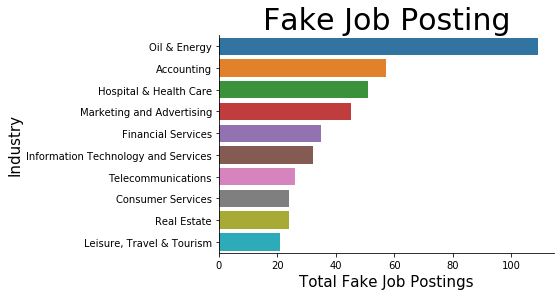

In [60]:
fig = sns.barplot(x="fraudulent",y="industry",data=grouped) #creating the barplot figure using the seaborn library.
#plotting fraudulent column on the x-axis and industry column on the y-axis to generate a horizontal bar chart. The columns were
#gotten from the dataframe stored under 'grouped' variable name.
plt.xlabel("Total Fake Job Postings", fontsize=15) #changing the name of the x-axis and increasing font size.
plt.ylabel("Industry",fontsize=15) #changing the name of the y-axis and increasing font size.
plt.title("Fake Job Posting",fontsize=30) #changing the name of the title of the graph and increasing the font size.
fig.spines["right"].set_visible(False) #removing the right-hand spine of the figure.
fig.spines["top"].set_visible(False) #removing the top spine of the figure.
plt.show() #displaying the graph.